In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
if not os.path.exists('./plots/'):
    os.makedirs('./plots/empirical')
    os.makedirs('./plots/ours/ranking')
    os.makedirs('./plots/ours/aggregation')
    os.makedirs('./plots/ours/thresholding')

sns.set_style('white')
# add in PLT params here

model_names = ['resnet18', 'resnet50', 'resnet101', 'MobileNetV2']
aug_names = ['combo', 'hflip', 'rotation', 'colorjitter', 'fivecrop', 'orig']

In [8]:
# Single augmentation accuracy comparison
results = pd.concat([pd.read_csv('./results/resnet50_agg_fs'),
                     pd.read_csv('./results/resnet101_agg_fs'),
                     pd.read_csv('./results/resnet18_agg_fs'),
                     pd.read_csv('./results/MobileNetV2_agg_fs')])
orig_accs = results[(results['aug'] == 'orig') & (results['agg']=='mean')]
def get_diff_top1(row):
    top1_orig_acc = orig_accs[orig_accs['model'] == row['model']]['top1'].values[0]
    return row['top1'] - top1_orig_acc
def get_diff_top5(row):
    top5_orig_acc = orig_accs[orig_accs['model'] == row['model']]['top5'].values[0]
    return row['top5'] - top5_orig_acc
results['top1_diff'] = results.apply(get_diff_top1, axis=1)
results['top5_diff'] = results.apply(get_diff_top5, axis=1)

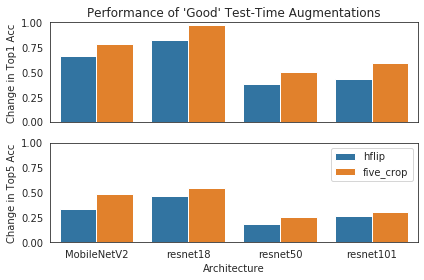

In [9]:
# single augmentation; grouped bar chart of differences between original accuracy vs augmentation 
sns.set_style('white')
model_order = ["MobileNetV2", "resnet18", "resnet50", "resnet101"]
aug_order = ['hflip', 'five_crop']
mean_results = results[(results['agg'] == 'mean') & (results['aug'] != 'orig')]
good_mean_results = mean_results[mean_results['aug'].isin(aug_order)]
fig, axs = plt.subplots(nrows=2, squeeze=False)
axs = axs.flatten()
sns.barplot(x='model', y='top1_diff', hue='aug', data=good_mean_results, ax=axs[0],
            hue_order=aug_order, order=model_order)
sns.barplot(x='model', y='top5_diff', hue='aug', data=good_mean_results, ax=axs[1],
            hue_order=aug_order, order=model_order)

axs[0].get_legend().set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlabel('')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Change in Top1 Acc')
axs[0].set_title("Performance of 'Good' Test-Time Augmentations")
axs[1].get_legend().set_visible(False)
axs[1].set_ylim(0, 1)
axs[1].set_ylabel('Change in Top5 Acc')
axs[1].set_xlabel('Architecture')
#axs[1].set_xtick_labels(['MobileNetV2', 'Resnet18', 'ResNet50', 'ResNet101'])

handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('./figs/partI/standard_aug_good.pdf', filetype='pdf', bbox_inches='tight')

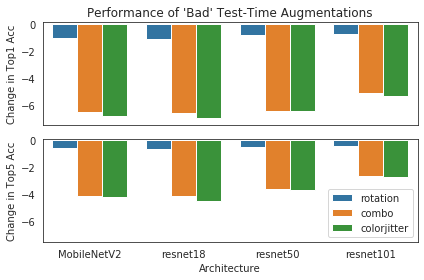

In [10]:
# single augmentation; grouped bar chart of differences between original accuracy vs augmentation 
sns.set_style('white')
model_order = ["MobileNetV2", "resnet18", "resnet50", "resnet101"]
aug_order = ['rotation', 'combo', 'colorjitter']
mean_results = results[(results['agg'] == 'mean') & (results['aug'] != 'orig')]
good_mean_results = mean_results[mean_results['aug'].isin(aug_order)]
fig, axs = plt.subplots(nrows=2, squeeze=False)
axs = axs.flatten()
sns.barplot(x='model', y='top1_diff', hue='aug', data=good_mean_results, ax=axs[0],
            hue_order=aug_order, order=model_order)
sns.barplot(x='model', y='top5_diff', hue='aug', data=good_mean_results, ax=axs[1],
            hue_order=aug_order, order=model_order)

axs[0].get_legend().set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlabel('')
axs[0].set_ylim(-7.5, .1)
axs[0].set_ylabel('Change in Top1 Acc')
axs[0].set_title("Performance of 'Bad' Test-Time Augmentations")
axs[1].get_legend().set_visible(False)
axs[1].set_ylim(-7.5, .1)
axs[1].set_ylabel('Change in Top5 Acc')
axs[1].set_xlabel('Architecture')
#axs[1].set_xticks(['MobileNetV2', 'Resnet18', 'ResNet50', 'ResNet101'])
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='lower right')

plt.tight_layout()
plt.savefig('./figs/partI/standard_aug_bad.pdf', filetype='pdf', bbox_inches='tight')

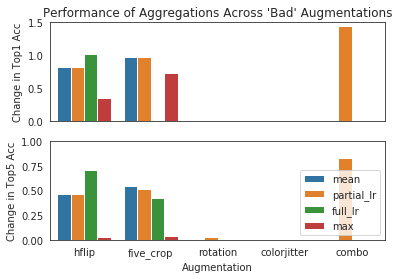

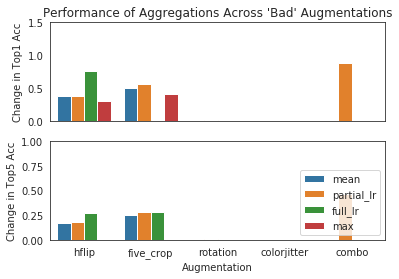

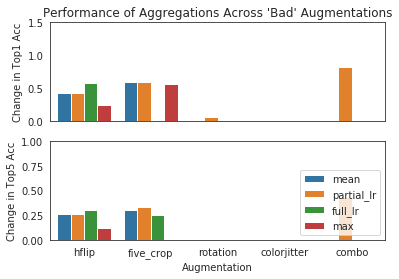

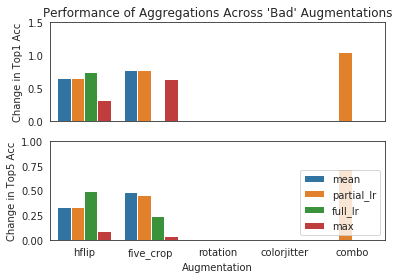

In [11]:
# Learning combinations of the single augmentations
# Show that this performs better than the simple average of the augmentations
# this normally does perform better....but with only 50 images from each class, not as good
# could produce 100 for a certian model to see if the # 
#of images changes things?
for model_name in model_names:
    good_augs = ['hflip', 'five_crop']
    bad_augs = ['rotation', 'colorjitter', 'combo']
    aug_order = good_augs + bad_augs
    one_resnet = results[(results['model'] == model_name) & (results['aug'] != 'orig')]
    one_resnet = one_resnet[one_resnet['aug'].isin(aug_order)]
    #one_resnet = one_resnet[(one_resnet['agg'] != 'full_lr') & (one_resnet['agg'] != 'max')]

    fig, axs = plt.subplots(nrows=2, squeeze=False)
    axs = axs.flatten()
    sns.barplot(x='aug', y='top1_diff', hue='agg', data=one_resnet, ax=axs[0],
                order=aug_order)
    sns.barplot(x='aug', y='top5_diff', hue='agg', data=one_resnet, ax=axs[1],
                order=aug_order)

    axs[0].get_legend().set_visible(False)
    axs[0].set_xticks([])
    axs[0].set_xlabel('')
    axs[0].set_ylim(0, 1.5)

    #axs[0].set_ylim(-7.5, .1)
    axs[0].set_ylabel('Change in Top1 Acc')
    axs[0].set_title("Performance of Aggregations Across 'Bad' Augmentations")
    axs[1].get_legend().set_visible(False)
    axs[1].set_ylabel('Change in Top5 Acc')
    axs[1].set_xlabel('Augmentation')
    handles, labels = axs[1].get_legend_handles_labels()
    axs[1].legend(handles, labels, loc='lower right')
    axs[1].set_ylim(0, 1)
#plt.tight_layout()


In [12]:
one_resnet

,Unnamed: 0,model,aug,agg,top1,top5,top1_diff,top5_diff
0,0,MobileNetV2,hflip,mean,71.893145,90.451613,0.661290,0.332661
1,1,MobileNetV2,hflip,partial_lr,71.889113,90.455645,0.657258,0.336694
2,2,MobileNetV2,hflip,full_lr,71.977823,90.614919,0.745968,0.495968
3,3,MobileNetV2,hflip,max,71.562500,90.213710,0.330645,0.094758
5,5,MobileNetV2,five_crop,mean,72.012097,90.604839,0.780242,0.485887
6,6,MobileNetV2,five_crop,partial_lr,72.012097,90.574597,0.780242,0.455645
7,7,MobileNetV2,five_crop,full_lr,70.812500,90.362903,-0.419355,0.243952
8,8,MobileNetV2,five_crop,max,71.875000,90.155242,0.643145,0.036290
9,9,MobileNetV2,colorjitter,mean,64.403226,85.929435,-6.828629,-4.189516
10,10,MobileNetV2,colorjitter,partial_lr,71.223790,90.100806,-0.008065,-0.018145


In [13]:
# Learning combinations of the aggregate augmentations
# Hope to show: now the aggregated augmentations benefit perforamnce, compared to before

/local/divyas/.conda/envs/testaug/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


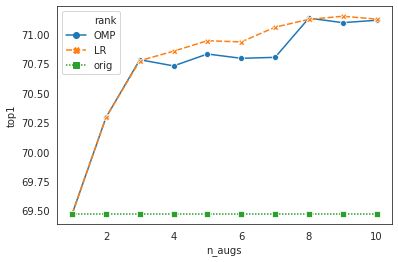

In [14]:
# Ranking plots
model_name = 'resnet18'
ranking = pd.read_csv('./results/' + model_name + '_ranking_fs')
orig_top1 = results[(results['agg'] == 'mean') & (results['aug'] == 'orig') 
                      &(results['model'] == model_name)]['top1'].values[0]
orig_top5 = results[(results['agg'] == 'mean') & (results['aug'] == 'orig') 
                      &(results['model'] == model_name)]['top5'].values[0]
dicts_to_add = [{'top1': orig_top1, 'top5': orig_top5, 'model': model_name, 
                 'rank': 'orig', 'n_augs': i+1} for i in range(10)]
ranking = pd.concat([ranking, pd.DataFrame(dicts_to_add)])
ranking = ranking[ranking['rank'] != 'APAC']
#ranking
sns.lineplot(x='n_augs',y='top1', hue='rank', style='rank',data=ranking, markers=True)
# add original accuracy


(68, 78)

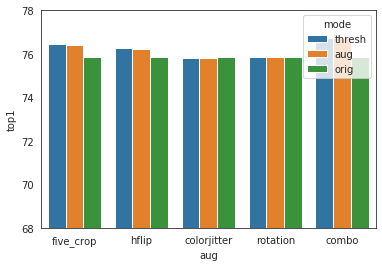

In [15]:
# Thresholding
model_name = 'resnet50'
agg_name = 'partial_lr'
thresholds = pd.read_csv('./results/' + model_name + '_thresholding_' + agg_name)
thresholds
sns.barplot(x='aug', y='top1', hue='mode', data=thresholds, hue_order=['thresh', 'aug', 'orig'])
#plt.ylim(90, 94)
plt.ylim(68, 78)
# maybe subtract out original accuracy?

In [16]:
# Anytime augmentation comparison - sampling more brightness or more rotation

In [17]:
# Robustness graph
